### Test tools and functions for the ambient AI agent team experiment

In [1]:
from slack_tools import slack_communication
from datetime import datetime
import pytz

import os
import dotenv
dotenv.load_dotenv()

from utils import get_latest_stock_image, encode_image, display_stock_image

from openai import OpenAI
client = OpenAI()

In [7]:
result = slack_communication(
    "Current time in Budapest and New York:\n"
    f"🇭🇺 Budapest: {datetime.now(pytz.timezone('Europe/Budapest')).strftime('%Y-%m-%d %H:%M')}\n"
    f"🗽 New York: {datetime.now(pytz.timezone('America/New_York')).strftime('%Y-%m-%d %H:%M')}"
)

In [8]:
# Example usage with a local image:
feedback = slack_communication(
    "How's your day going?", 
    require_feedback=True,
)

print(f"Received feedback: {feedback}")

Message sent, waiting for feedback (timeout: 60s)...
Received feedback: good


In [62]:
# Example usage with a local image:
result = slack_communication(
    "yo check it out", 
    image_path="../../output/social_media_experiment/AI rats overtaking New York City_img.png"
)

In [63]:
# Example with local image and waiting for feedback:
feedback = slack_communication(
    "What do you think of this local image?", 
    require_feedback=True,
    image_path="../../output/social_media_experiment/AI rats overtaking New York City_img.png"
)
print(f"Received feedback: {feedback}")

Message sent, waiting for feedback (timeout: 60s)...
Received feedback: yppppe


In [64]:
# Example usage with a local image:
result = slack_communication(
    "Here's an image from the internet", 
    image_url="https://miro.medium.com/v2/resize:fit:549/1*g-YZo7s0j46lDQfMmQ955A.png"
)
print(result)

Here's an image from the internet


In [65]:
# Example usage with a local image:
feedback = slack_communication(
    "what do you see here bro?", 
    require_feedback=True,
    image_url="https://miro.medium.com/v2/resize:fit:549/1*g-YZo7s0j46lDQfMmQ955A.png"
)

print(f"Received feedback: {feedback}")

Message sent, waiting for feedback (timeout: 60s)...
Received feedback: nice logo man!


#### Test image input to API

In [6]:
# showing how to get the latest plot path (abscolute and relative)
#latest_plot_path = get_latest_stock_image()
#latest_plot_path_rel = os.path.relpath(latest_plot_path)

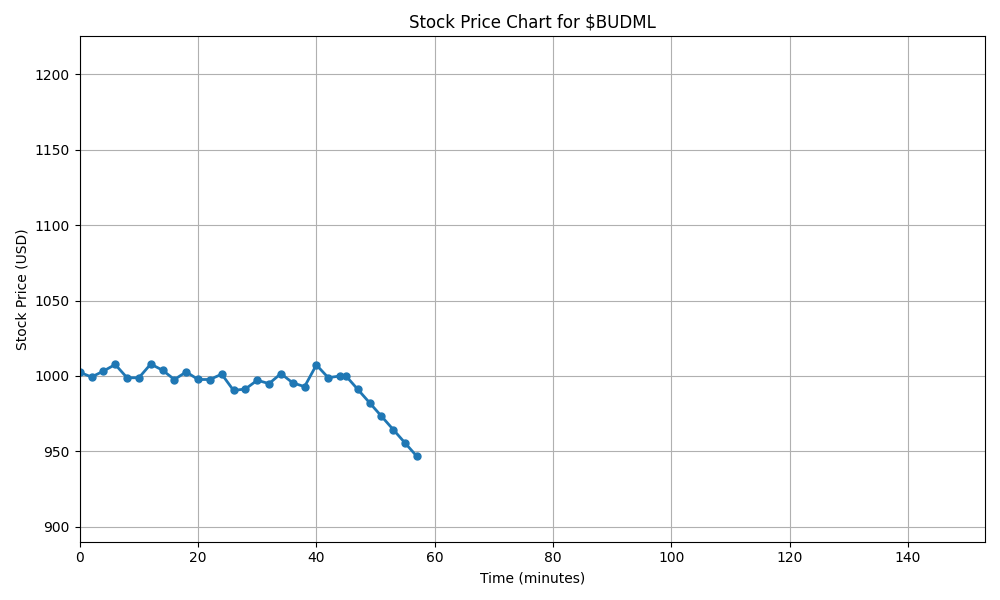

In [3]:
# Get the latest stock image
image_path = get_latest_stock_image()

# Show the image
display_stock_image(image_path)

# Getting the Base64 string
base64_image = encode_image(image_path)

In [4]:
for model in ["gpt-4o-2024-11-20", "o1-2024-12-17"]:
    print("\n" + "="*50)
    print(f"Testing Model: {model}")
    print("="*50 + "\n")
    
    for detail in ["low", "high"]:
        print(f"Image Detail Level: {detail}")
        print("-"*30 + "\n")
        
        completion = client.chat.completions.create(
            model=model,
            messages=[
                {
                    "role": "system",
                    "content": "You are an expert stock market analyst and decision maker. You excel at analyzing stock market time series and evaluating future market trends."
                },
                {
                    "role": "user",
                    "content": [
                        { "type": "text", "text": "Given the plot of a stock, analyze the trend and provide a recommendation for next action." },
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{base64_image}",
                                "detail": detail
                            },
                        },
                    ],
                }
            ],
        )

        print("Model Response:")
        print(completion.choices[0].message.content)
        print("\n")


Testing Model: gpt-4o-2024-11-20

Image Detail Level: low
------------------------------

Model Response:
The stock price chart for "§BUDML" shows a downward trend:

1. **Initial Stability (0 to ~50 minutes):**
   - The price hovered close to $1000 with minor fluctuations, indicating initial stability.

2. **Sharp Decline (~50 to ~70 minutes):**
   - There is a steep drop in the stock price, going below $950. This sharp downward move signals potential negative sentiment or unfavorable news impacting the stock.

3. **Recommendation:**
   - **Short-term traders:** Consider selling or shorting the stock if further decline is expected.
   - **Long-term investors:** Investigate the cause of the sudden drop. If caused by temporary factors, it may present a buying opportunity after thorough analysis of fundamentals.
   - **Caution:** Avoid purchasing at this time unless there's clear evidence of a potential recovery.

It’s crucial to monitor news, announcements, or sector-wide trends associa

Same thing with the Responses API

```python
for model in ["gpt-4o-2024-11-20", "o1-2024-12-17"]:
    print("\n" + "="*50)
    print(f"Testing Model: {model}")
    print("="*50 + "\n")
    
    for detail in ["low", "high"]:
        print(f"Image Detail Level: {detail}")
        print("-"*30 + "\n")
        
        response = client.responses.create(
            model=model,
            input=[
                {
                    "role": "user",
                    "content": [
                        { "type": "input_text", "text": "what's in this image?" },
                        {
                            "type": "input_image",
                            "image_url": f"data:image/jpeg;base64,{base64_image}",
                            "detail": detail
                        },
                    ],
                }
            ],
        )

        print("Model Response:")
        print(response.output_text)
        print("\n")
```